In [2]:
!pip install interpret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 925.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.1/780.1 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.7/264.7 kB 11.1 MB/s eta 0:00:00
  Created whe

In [6]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283913 sha256=c22808e90319e1bf565e9f205fa388a6f8c2e5099f4b122b0134ec521cafd272
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [7]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

In [13]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import LimeTabular

seed = 42
#np.random.seed(seed)
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

pca = PCA()
rf = RandomForestClassifier(random_state=seed)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

lime = LimeTabular(blackbox_model, X_train)

In [10]:
print(len(X_train))

455


In [14]:
show(lime.explain_local(X_test[:10],y_test[:10]),0)

In [15]:
file_path='/content/HousingData.csv'

In [22]:
import pandas as pd
import numpy as SpaceInInput
import pandas as pd
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
df = pd.read_csv(file_path)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [23]:
#Declare feature vectr and target variable
X = df[['LSTAT','RM','NOX', 'PTRATIO', 'DIS','AGE']]
y=df['MEDV']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10
                              )
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

In [66]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

NameError: name 'fig' is not defined

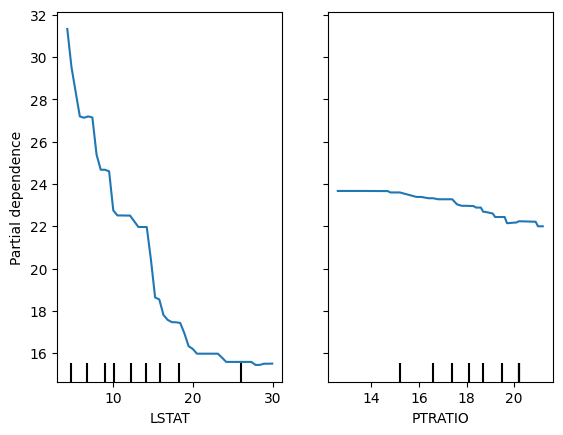

In [32]:
features_names = ['LSTAT','RM', 'NOX', 'PTRATIO', 'DIS', 'AGE']

features_to_plot= [0,3]

PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features_to_plot,
    feature_names=features_names,
    kind='average',
    grid_resolution=50,
)
fig.axes_[0][0].set_xlim(0,25)
fig.axes_[0][0].set_ylim(0,30)
plt.title('PDP')
plt.show()

In [55]:
file_pathBrain='/content/AI_in_HealthCare_Dataset.csv'

In [56]:
df = pd.read_csv(file_pathBrain)
df.head()

,Patient_ID,Age,Gender,Blood_Pressure,Heart_Rate,Temperature,Diagnosis,Medication,Treatment_Duration,Insurance_Type,Doctor_Name,Hospital_Name,Lab_Test_Results,X-ray_Results,Surgery_Type,Recovery_Time,Allergies,Family_History,Patient_Satisfaction,AI_Diagnosis_Confidence
0,1,62,Female,102.349134,79.827209,98.912361,Hypertension,Statins,24,Uninsured,Dr. Brown,Children's Hospital,114.906151,Abnormal,Appendectomy,5,Latex,Heart Disease,3,0.917404
1,2,65,Male,137.760933,72.817449,98.912508,Hypertension,Insulin,29,Uninsured,Dr. Wang,Healthcare Clinic,88.556974,Normal,Knee Replacement,2,Shellfish,Diabetes,4,0.811706
2,3,82,Male,97.618564,57.135424,99.189728,Influenza,Chemotherapy,15,Private,Dr. Johnson,Children's Hospital,106.705047,Normal,Gallbladder Removal,7,NaN,Hypertension,2,0.802673
3,4,85,Male,121.743752,67.355838,96.033487,Heart Disease,Chemotherapy,5,Private,Dr. Smith,Healthcare Clinic,83.043268,Normal,Cataract Surgery,7,Latex,Hypertension,5,0.816811
4,5,85,Male,129.530450,64.849416,99.077675,Heart Disease,Insulin,10,Private,Dr. Lee,Children's Hospital,85.543826,Abnormal,Appendectomy,9,Shellfish,Diabetes,1,0.750850


In [63]:
#Declare feature vectr and target variable
X = df[['Age', 'Heart_Rate','Blood_Pressure','Treatment_Duration']]
y=df['AI_Diagnosis_Confidence']



In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [65]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10
                              )
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

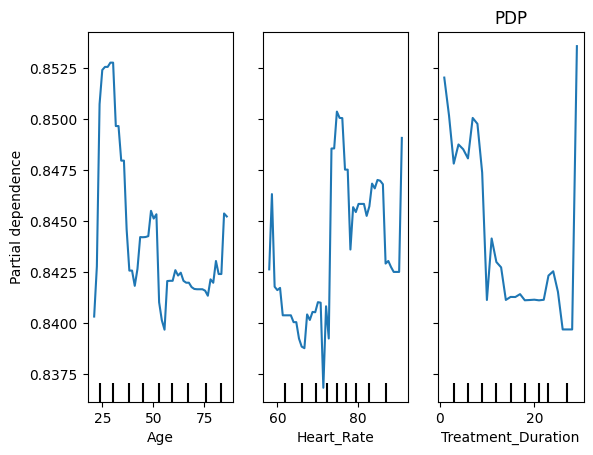

In [67]:
features_names = ['Age', 'Heart_Rate','Blood_Pressure','Treatment_Duration']

features_to_plot= [0,1,3]

PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features_to_plot,
    feature_names=features_names,
    kind='average',
    grid_resolution=50,
)
#fig.axes_[0][0].set_xlim(0,25)
#fig.axes_[0][0].set_ylim(0,30)
plt.title('PDP')
plt.show()